<a href="https://colab.research.google.com/github/lamld203844/biosignal-processing/blob/main/final/playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project

1. Each student, by the order in the class list, processing the EEG data upload in file tab in the Teams class.
2. Requirements
    - Read data
    - Extract the channels data
    - Plot the original data in time-series with the full of title, units
    - Analyze the data to identify signal and noises
    - Design filters to eliminate the DC component, Electricity noise, and others (if contaminated)
    - Apply the filters to the data to reduce the noises and increase the SNR (signal to noise ratio) as well. Show the noise reduction and SNR increasing values
    - Show the difference between the original data and processed data in both time domain and frequency domain
    - Design spectrogram for each data channels with frequency resolution of 1 Hz
3. Write report
4. Present the works in steps, algorithms (if applicable), purposes, and goals
5. Show the parameters for the design jobs, explain the reason to choose that parameters.
6. Show each results and discuss about the results
<hr/>

Analyze directory tree and role of each file

In [ ]:
sub-NORB00027
    └── ses-1
        ├── eeg
        │   ├── sub-NORB00027_ses-1_coordsystem.json # coordinate system
        │   ├── sub-NORB00027_ses-1_electrodes.tsv # electrodes: name, position(x,y,z), metadata: type + material
        │   ├── sub-NORB00027_ses-1_task-EEG_channels.tsv # el
        │   ├── sub-NORB00027_ses-1_task-EEG_eeg.edf
        │   ├── sub-NORB00027_ses-1_task-EEG_eeg.json
        │   └── sub-NORB00027_ses-1_task-EEG_events.tsv
        └── sub-NORB00027_ses-1_scans.tsv

#### General (global) variable

In [1]:
data_path = '/workspaces/biosignal-processing/final/sub-NORB00027/ses-1/eeg/sub-NORB00027_ses-1_task-EEG_eeg.edf'

<hr/>

# 1. Read data

- First, we need to load the EEG data from the provided files. The **`sub-NORB00027_ses-1_task-EEG_eeg.edf`** file contains the raw EEG data.
- We’ll use a library **`mne`** (MNE-Python) to read the data, can be installed via **`pip install mne`**.

In [2]:
import mne
import matplotlib.pyplot as plt

# Load the EEG data
raw = mne.io.read_raw_edf(data_path, preload=True)
print('================= Basic information ===========================')
raw

Extracting EDF parameters from /workspaces/biosignal-processing/final/sub-NORB00027/ses-1/eeg/sub-NORB00027_ses-1_task-EEG_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 118399  =      0.000 ...   591.995 secs...
================= Basic information ===========================


Measurement date,"January 01, 2023 08:34:15 GMT"
Experimenter,Unknown
Participant,M
Digitized points,Not available
Good channels,19 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,200.00 Hz
Highpass,0.50 Hz
Lowpass,100.00 Hz


In [3]:
d = raw.to_data_frame()
d

,time,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,F7,F8,T3,T4,T5,T6,FZ,CZ,PZ
0,0.000,37.794060,38.802208,35.275967,41.127494,32.365882,67.594096,31.063564,48.486317,17.823710,21.595655,38.462062,43.636654,22.867763,32.669299,10.572697,32.479961,41.396177,38.978471,48.259253
1,0.005,40.119658,42.150950,36.210545,44.238100,33.409961,71.876571,33.488515,53.148359,16.666285,20.902811,39.744096,46.530156,23.560606,37.821512,8.388764,37.816365,43.140376,41.414656,52.910449
2,0.010,39.887098,43.190215,33.874101,45.966214,31.437811,67.362611,31.871881,49.418725,16.434800,19.979021,37.413124,48.266258,22.405867,39.460852,7.239326,38.280401,44.652015,42.458735,49.654612
3,0.015,37.794060,41.920002,31.888124,46.542252,29.465662,65.047760,30.370721,48.719419,16.897770,20.440916,35.548346,49.192179,21.020181,37.821512,9.997978,36.888295,43.605496,40.950620,48.026693
4,0.020,34.538222,38.802208,30.603080,45.274968,30.509741,63.658850,31.409985,50.817338,17.129255,19.979021,34.149763,47.803298,21.020181,36.884746,13.331348,38.512418,41.396177,38.746453,48.724372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118395,591.975,36.398701,34.067780,40.182499,33.869414,40.370489,35.533410,38.684839,32.985027,17.823710,19.055230,39.044805,18.405310,19.403547,29.976097,4.940449,23.199257,38.140340,36.774304,34.305662
118396,591.980,33.840542,32.682093,36.444189,32.026092,38.514348,34.838955,37.530100,33.334680,19.675591,22.057550,35.781444,18.289570,17.325017,31.732533,5.400225,25.287416,36.512421,35.150181,34.770782
118397,591.985,30.003305,30.026194,32.004946,30.528393,35.034084,32.524104,35.451571,31.120210,19.907076,21.364707,32.051888,17.710870,17.209543,30.912863,6.549663,25.403425,34.884502,32.597987,32.677743
118398,591.990,27.328867,28.525034,29.318036,29.721939,32.249873,32.408361,33.834936,30.537455,19.907076,20.902811,28.905076,17.363649,16.170278,33.137682,6.089888,25.751451,32.326343,30.161803,31.166104


<hr>

# 2. Extract Channels information:
- Once we’ve loaded the data, we’ll extract the EEG channels. These channels represent the electrical activity recorded from different scalp locations.
- We’ll identify the relevant channels (e.g., Fp1, Fp2, Cz, Pz, etc.) and extract their time-series data.

In [4]:
raw

Measurement date,"January 01, 2023 08:34:15 GMT"
Experimenter,Unknown
Participant,M
Digitized points,Not available
Good channels,19 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,200.00 Hz
Highpass,0.50 Hz
Lowpass,100.00 Hz


In [5]:
# channel information
print(f'Channel names: {raw.ch_names}')
print(f'Number of channels: {len(raw.ch_names)}')

Channel names: ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'FZ', 'CZ', 'PZ']
Number of channels: 19


- Summarize statistic on each channel

In [6]:
d.describe()

,time,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,F7,F8,T3,T4,T5,T6,FZ,CZ,PZ
count,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000
mean,295.997500,7.270163,6.427694,6.844579,6.264259,7.354548,6.816291,6.967986,7.751543,5.453543,6.682922,5.881834,7.215296,6.289558,7.745675,5.797608,6.368118,7.519240,6.224402,7.353963
std,170.896401,32.345300,32.354484,31.915020,32.390927,29.892493,30.749590,29.739084,30.370865,30.914219,30.258941,31.663531,31.729559,29.902849,29.802448,29.074897,29.718801,32.769295,32.828391,30.584355
min,0.000000,-230.580000,-229.790000,-232.130000,-229.380000,-229.930000,-229.980000,-229.330000,-230.770000,-231.370000,-229.560000,-232.630000,-229.510000,-230.020000,-231.850000,-229.430000,-230.860000,-230.350000,-231.090000,-230.580000
25%,147.998750,-5.578351,-6.925442,-5.845440,-7.029292,-4.176888,-4.976483,-4.040491,-3.495452,-5.787770,-4.501439,-5.942958,-4.974191,-4.153122,-1.639756,-4.140112,-3.250747,-6.278591,-7.425046,-4.182992
50%,295.997500,7.212440,6.354052,6.771356,6.104377,7.423991,6.829257,6.929526,7.693449,5.323515,6.584052,5.945000,7.178520,6.355000,7.727904,5.974944,6.377982,7.326160,6.147982,7.328720
75%,443.996250,20.003232,19.518073,19.621795,19.583669,18.792853,18.403512,18.015017,18.998901,16.550542,17.785017,17.483312,19.446971,16.978596,17.095564,15.860112,16.122721,21.163471,19.837020,18.724152
max,591.995000,245.470000,242.960000,246.140000,242.280000,245.010000,243.870000,243.420000,246.390000,242.480000,243.190000,244.520000,244.330000,242.730000,247.540000,241.150000,244.080000,245.700000,243.850000,245.470000


# 3. Plot original signal

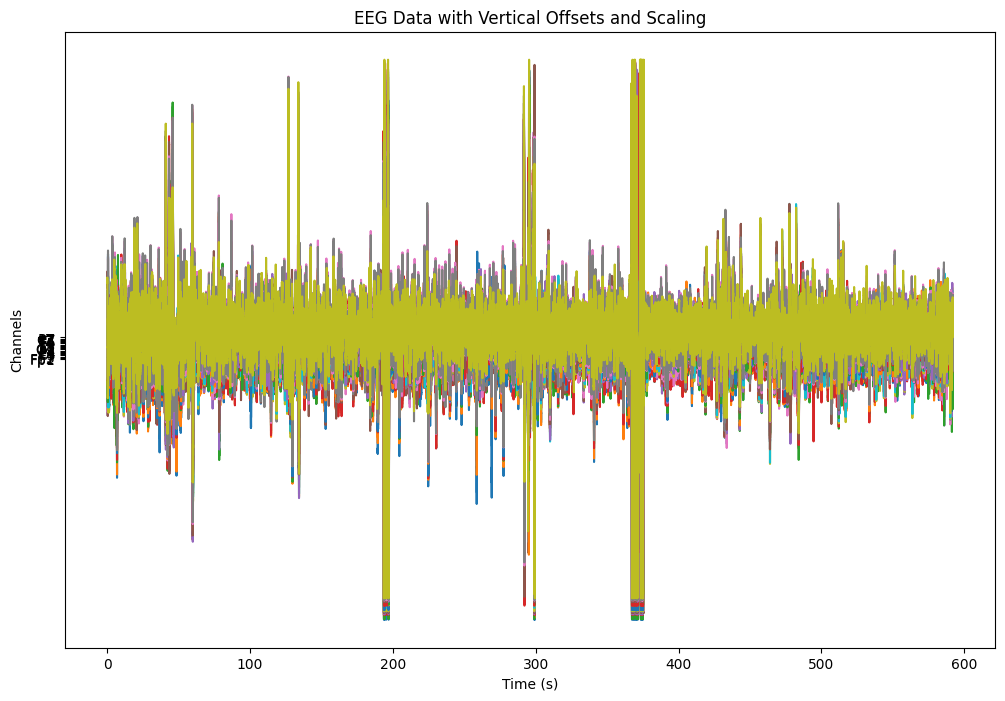

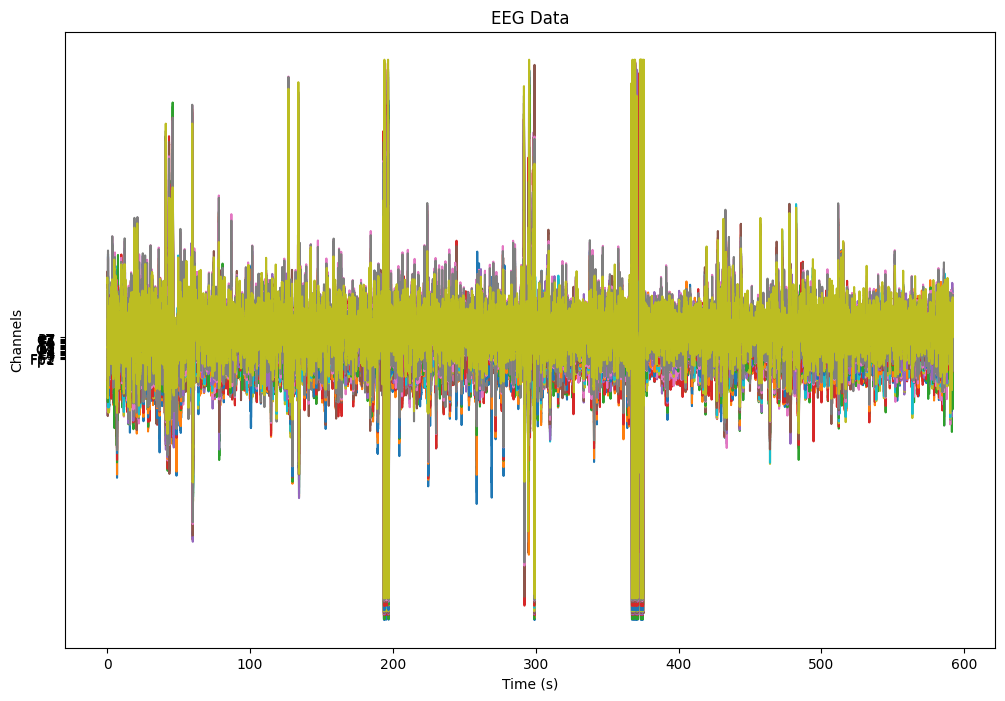

In [25]:
# Extract data and times
data, times = raw[:]

# Define the vertical offset
offset = np.linspace(0, 10 * len(data), len(data))

# Define the scaling factor
scaling_factor = 10e6  # Adjust this value to scale the signals appropriately

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each channel with an offset and scaling
for i, channel_data in enumerate(data):
    ax.plot(times, channel_data * scaling_factor + offset[i])

# Set labels and title
ax.set_xlabel('Time (s)')
ax.set_ylabel('Channels')
ax.set_title('EEG Data with Vertical Offsets and Scaling')
ax.yaxis.set_ticks(offset)
ax.yaxis.set_ticklabels(raw.ch_names)

plt.show()# Extract data and times
data, times = raw[:]

# Define the vertical offset
offset = np.linspace(0, 10 * len(data), len(data))

# Define the scaling factor
scaling_factor = 10e6  # Adjust this value to scale the signals appropriately

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each channel with an offset and scaling
for i, channel_data in enumerate(data):
    ax.plot(times, channel_data * scaling_factor + offset[i])

# Set labels and title
ax.set_xlabel('Time (s)')
ax.set_ylabel('Channels')
ax.set_title('EEG Data')
ax.yaxis.set_ticks(offset)
ax.yaxis.set_ticklabels(raw.ch_names)

plt.show()

#### MNE

Using matplotlib as 2D backend.


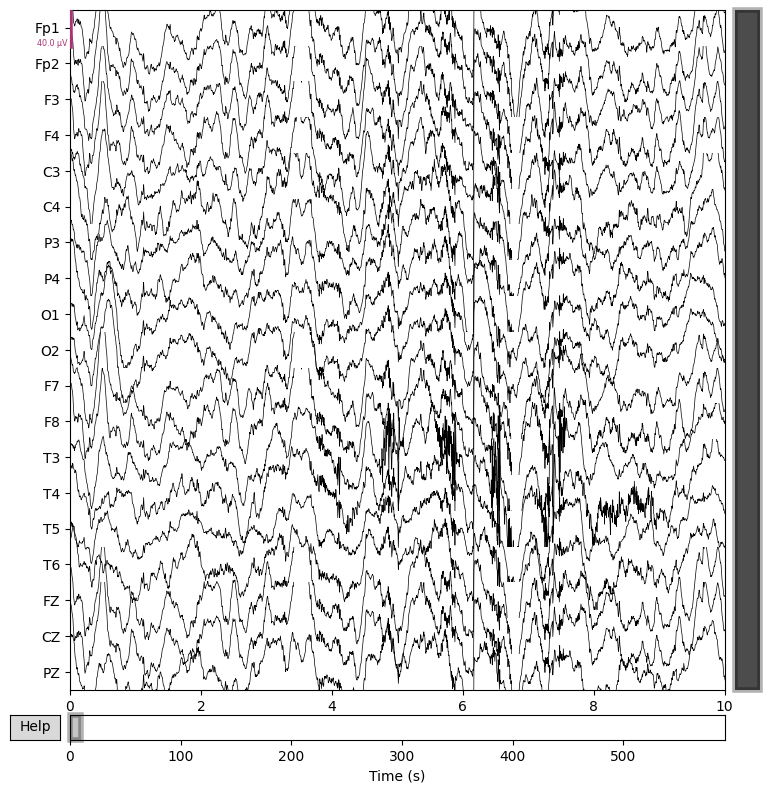

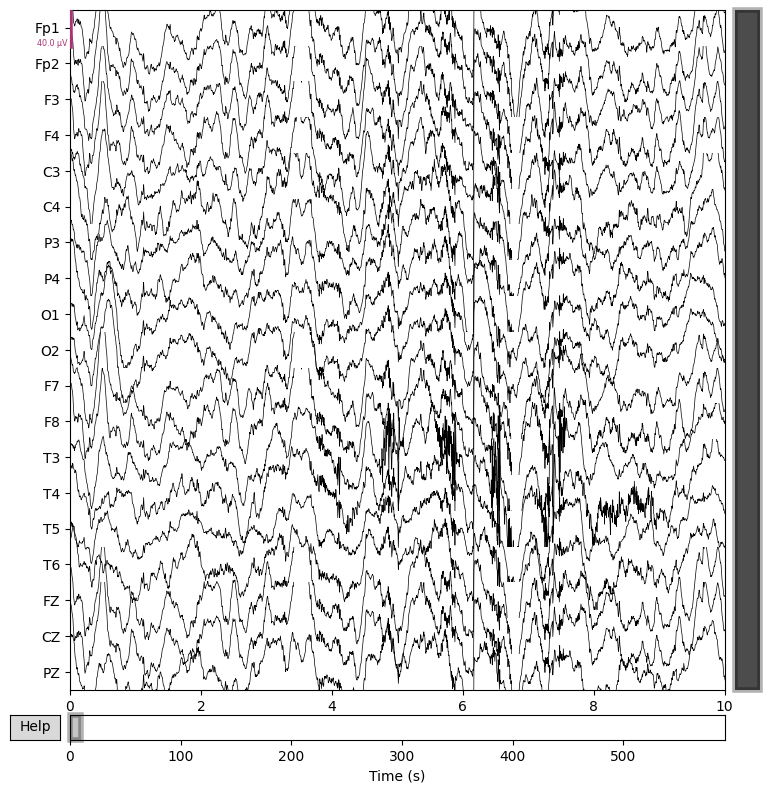

In [8]:
import mne
import matplotlib.pyplot as plt

# Load the EEG data
data_path = '/workspaces/biosignal-processing/final/sub-NORB00027/ses-1/eeg/sub-NORB00027_ses-1_task-EEG_eeg.edf'
raw = mne.io.read_raw_edf(data_path, preload=True)

# ==== Visualize with MNE ========= 
# Plot the original data in time-series with the full title, units
raw.plot(title='Raw EEG data', show_options=True)

#### Matplotlib

In [39]:
data.max()

0.00024754

/tmp/ipykernel_1679/970184080.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', n_channels) # each channel has its own color


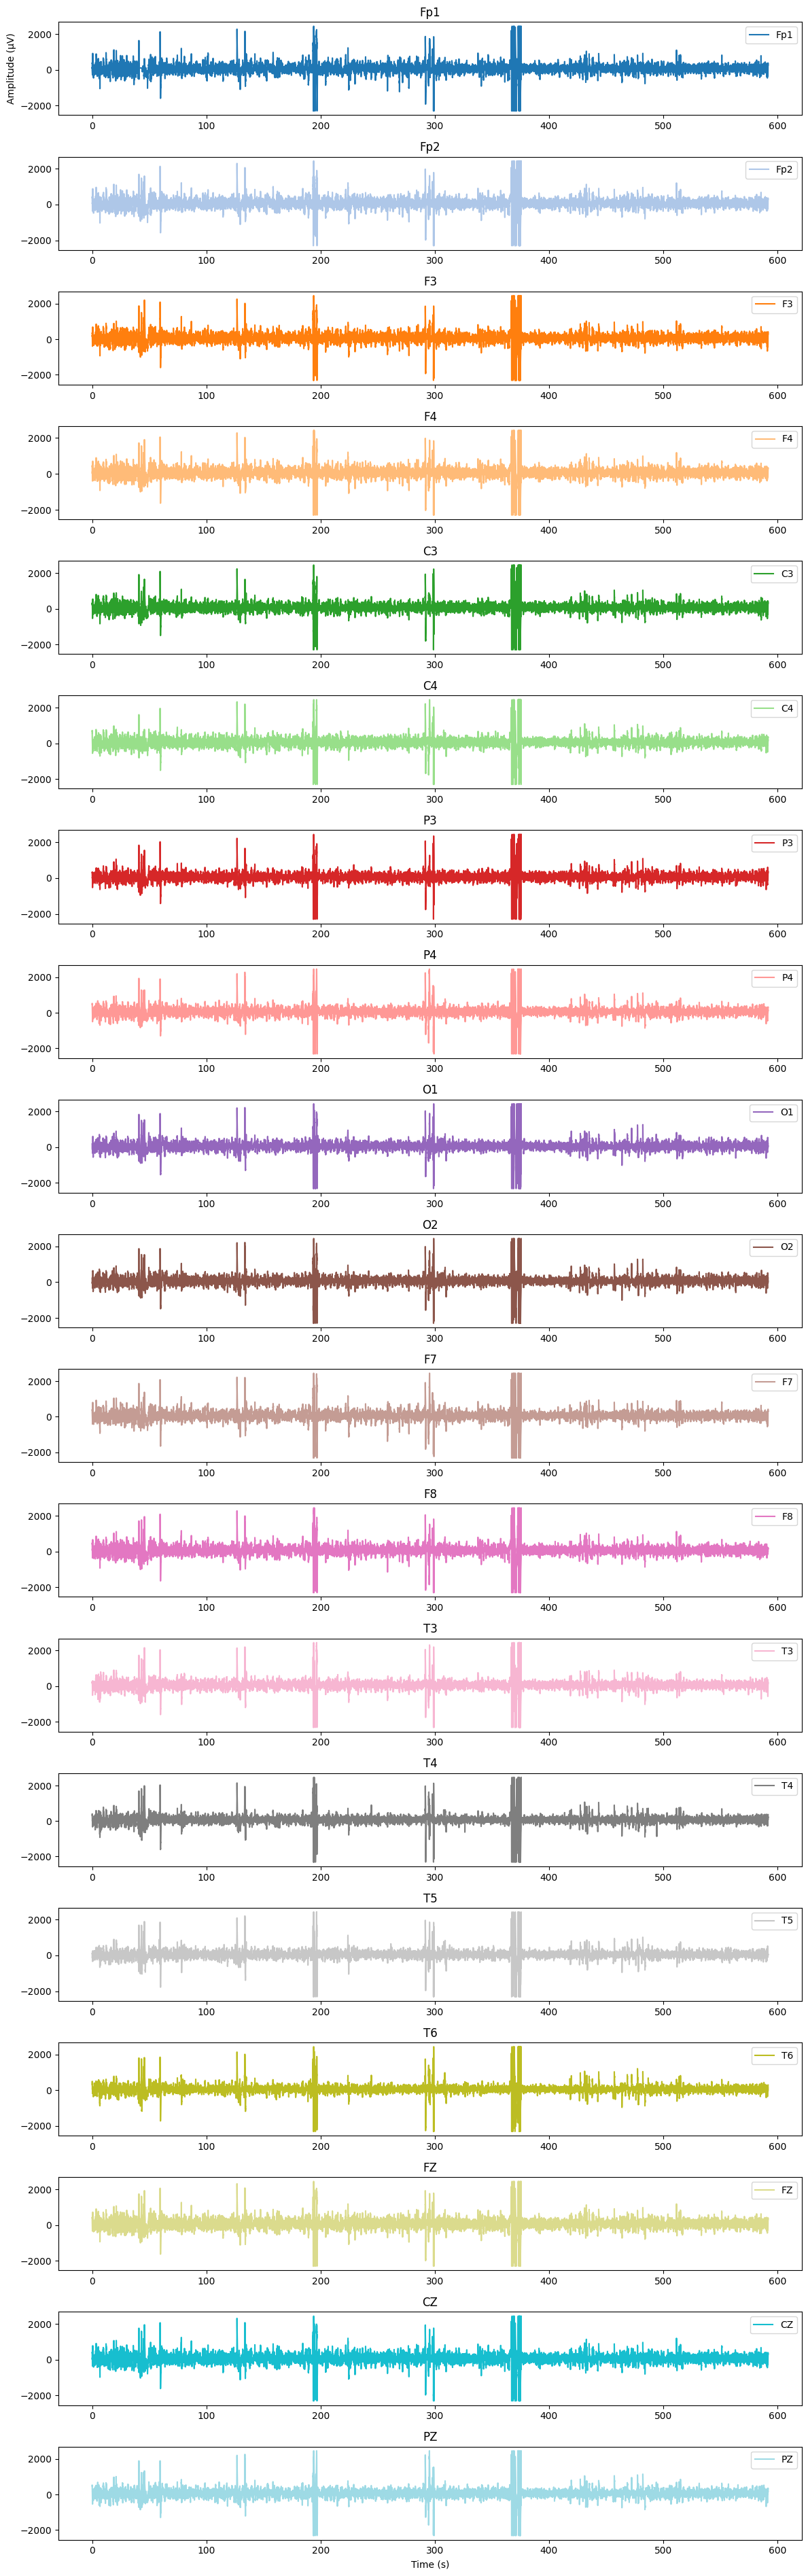

In [21]:
# ========== Visualizing each channel purely with numpy ==============
data, times = raw[:] # data
ch_names = raw.ch_names # channel name
n_channels = len(ch_names) # num channel
s_frequency = raw.info['sfreq']

scaled_data = [data[i] * 10e6 for i in range(len(data))]

# Subplots
fig, axes = plt.subplots(n_channels, 1, figsize=(12, 2*n_channels))

# Plot each channel in a separate subplot
colors = plt.cm.get_cmap('tab20', n_channels) # each channel has its own color

for i in range(n_channels):
    axes[i].plot(times, scaled_data[i], label=ch_names[i], color=colors(i))
    axes[i].set_title(ch_names[i])
    axes[i].legend(loc='upper right')

# Set labels for the x-axis and y-axis
axes[-1].set_xlabel('Time (s)')
axes[0].set_ylabel('Amplitude (µV)')

# Display the plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_1679/260571934.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', n_channels) # each channel has its own color


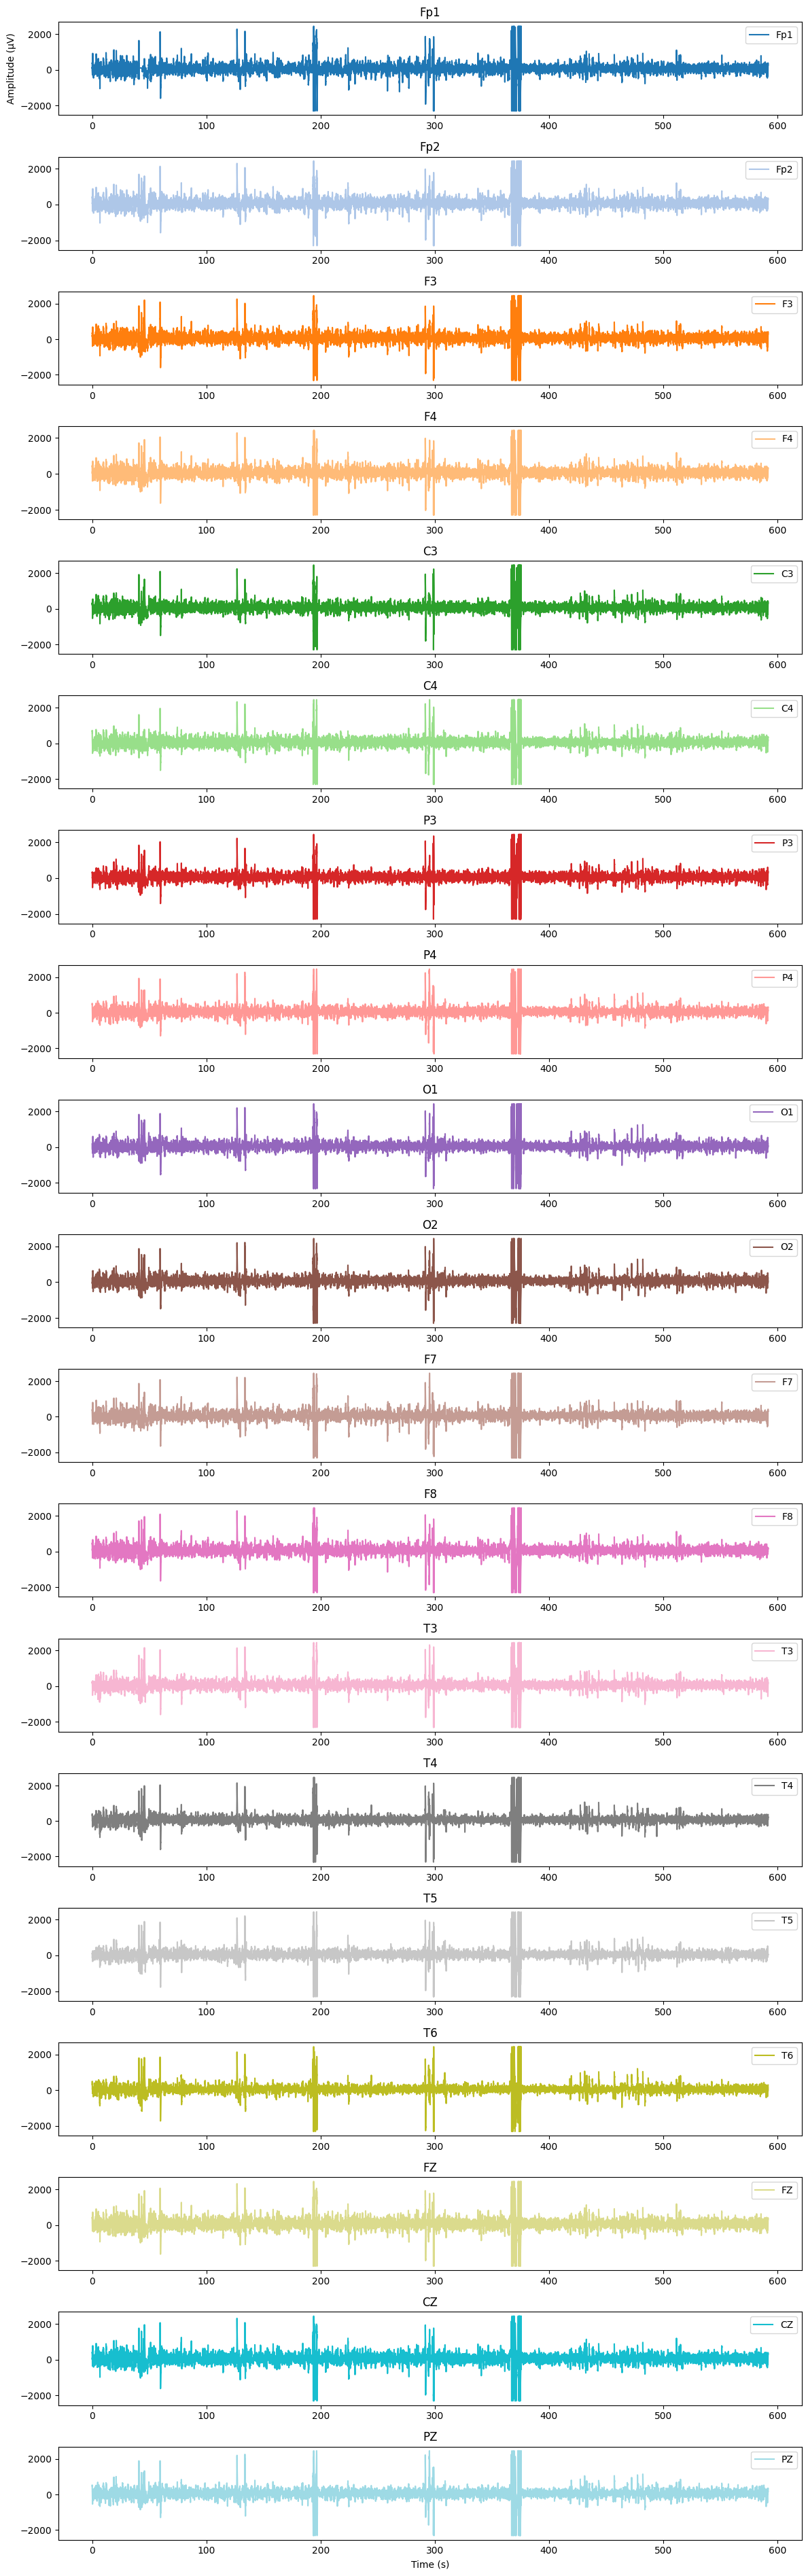

In [18]:
# ========== Visualizing each channel purely with numpy ==============
data, times = raw[:] # data
ch_names = raw.ch_names # channel name
n_channels = len(ch_names) # num channel
s_frequency = raw.info['sfreq']

scaled_data = [data[i] * 10e6 for i in range(len(data))]

# Subplots
fig, axes = plt.subplots(n_channels, 1, figsize=(12, 2*n_channels))

# Plot each channel in a separate subplot
colors = plt.cm.get_cmap('tab20', n_channels) # each channel has its own color

for i in range(n_channels):
    axes[i].plot(times, scaled_data[i], label=ch_names[i], color=colors(i))
    axes[i].set_title(ch_names[i])
    axes[i].legend(loc='upper right')

# Set labels for the x-axis and y-axis
axes[-1].set_xlabel('Time (s)')
axes[0].set_ylabel('Amplitude (µV)')

# Display the plot
plt.tight_layout()
plt.show()


#### pyedflib

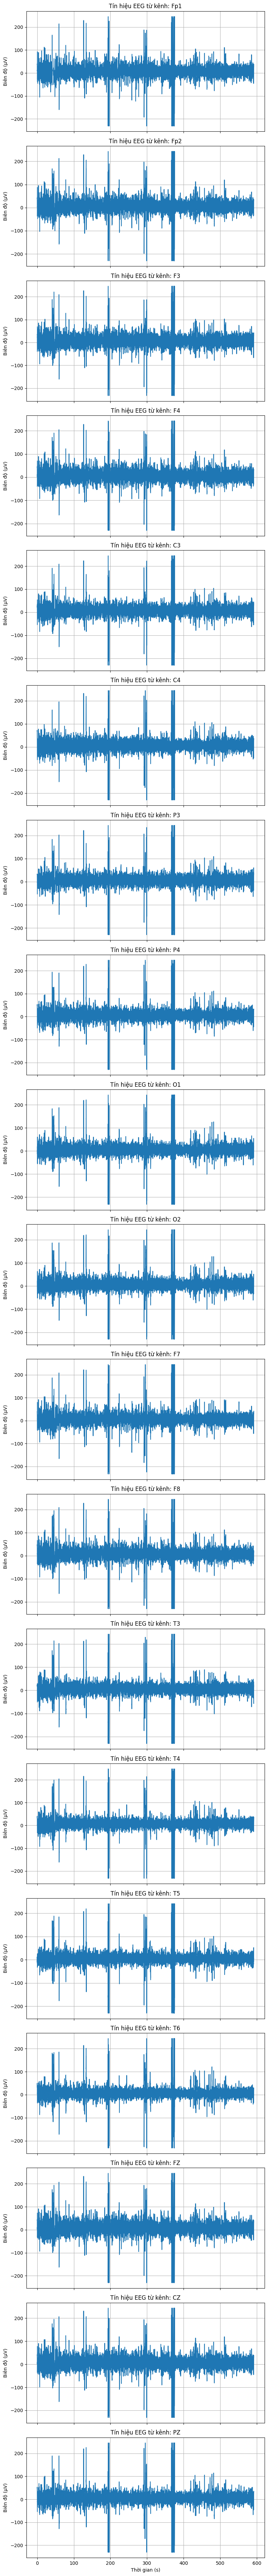

In [2]:
import pyedflib 
import numpy as np 
import matplotlib.pyplot as plt 

# Mở tệp EDF 
data_eeg_edf = pyedflib.EdfReader(data_path) 

# Lấy thông tin cần thiết từ tệp EDF 
num_channels = data_eeg_edf.signals_in_file 
channel_labels = data_eeg_edf.getSignalLabels() 
sample_frequency = data_eeg_edf.getSampleFrequency(0) 

# Đọc dữ liệu từ tất cả các kênh 
signals = [data_eeg_edf.readSignal(i) for i in range(num_channels)] 

# Tạo vector thời gian cho tín hiệu 
signal_length = len(signals[0])  # Giả sử tất cả các kênh có cùng độ dài 
time_vector = np.linspace(0, signal_length / sample_frequency, signal_length) 

# Tạo một figure với các subplots 
fig, axes = plt.subplots(num_channels, 1, figsize=(8, 4 * num_channels), sharex=True) 

for i in range(num_channels): 
    axes[i].plot(time_vector, signals[i]) 
    axes[i].set_title(f"Tín hiệu EEG từ kênh: {channel_labels[i]}") 
    axes[i].set_ylabel("Biên độ (µV)") 
    axes[i].grid(True) 

axes[-1].set_xlabel("Thời gian (s)") 
plt.tight_layout() 
plt.show() 

# Analysis original

Effective window size : 10.240 (s)
Plotting power spectral density (dB=True).


<ipython-input-9-5a391332be32>:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  psd_fig = raw.compute_psd().plot() # power spectral density
<ipython-input-9-5a391332be32>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  psd_fig = raw.compute_psd().plot() # power spectral density


Text(0.5, 0.98, 'Power Spectral Density of Original EEG Data')

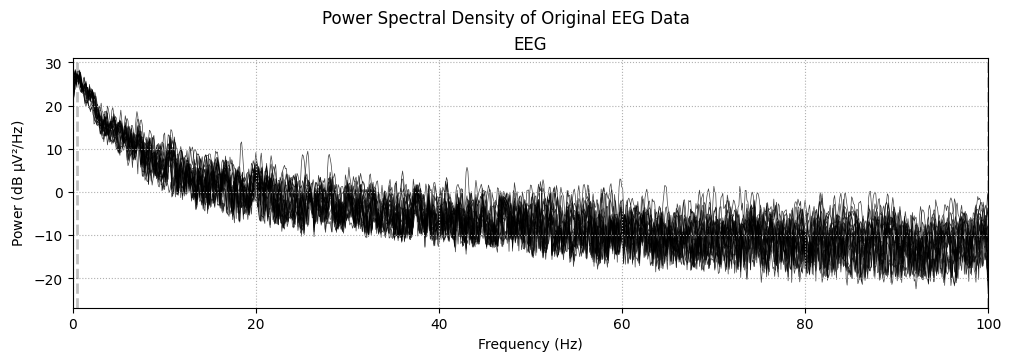

In [9]:
# Analyze the data to identify signal and noises
psd_fig = raw.compute_psd().plot() # power spectral density
psd_fig.suptitle("Power Spectral Density of Original EEG Data")